In this code, we use the Iris flower data set. That data set contains three classes of 50 instances each, where each class refers to a type of Iris plant.

In [3]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

Load Iris data set from Scikitlearn, no need to download it separately:

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:,:2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

We’ll create two objects from SVM, to create two different classifiers; one with Polynomial kernel, and another one with RBF kernel:

In [6]:
X_train

array([[6.5, 3. ],
       [5.5, 2.5],
       [6.5, 3. ],
       [5.8, 2.7],
       [6.8, 3. ],
       [5.7, 2.8],
       [6.7, 3.1],
       [5.9, 3. ],
       [5.6, 2.7],
       [7.7, 3. ],
       [5.1, 3.7],
       [4.6, 3.6],
       [4.7, 3.2],
       [6.7, 3. ],
       [5.6, 3. ],
       [4.3, 3. ],
       [7.1, 3. ],
       [5.8, 2.7],
       [4.9, 3.1],
       [5.1, 2.5],
       [5.6, 2.5],
       [5.1, 3.3],
       [5.8, 2.7],
       [5. , 3.6],
       [4.9, 2.4],
       [6.7, 2.5],
       [5.8, 2.6],
       [4.9, 3.6],
       [5.1, 3.4],
       [6.1, 3. ],
       [4.6, 3.4],
       [6.4, 3.2],
       [7.7, 2.6],
       [6.3, 3.4],
       [5.4, 3. ],
       [5.8, 4. ],
       [6. , 2.9],
       [4.6, 3.1],
       [5.8, 2.7],
       [6.9, 3.2],
       [6. , 3.4],
       [6.2, 3.4],
       [6.6, 2.9],
       [6.3, 3.3],
       [4.7, 3.2],
       [4.8, 3. ],
       [4.9, 3.1],
       [6.5, 2.8],
       [4.6, 3.2],
       [5.1, 3.8],
       [5. , 3.4],
       [7.4, 2.8],
       [5.2,

In [7]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

To calculate the efficiency of the two models, we’ll test the two classifiers using the test data set:

In [8]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

Finally, we’ll calculate the accuracy and f1 scores for SVM with Polynomial kernel:

In [9]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In the same way, the accuracy and f1 scores for SVM with RBF kernel:

In [10]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


Out of the known metrics for validating machine learning models, we choose Accuracy and F1 as they are the most used in supervised machine learning.

For the accuracy score, it shows the percentage of the true positive and true negative to all data points. So, it’s useful when the data set is balanced.

For the f1 score, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, it’s useful to calculate the f1 score when the data set isn’t balanced.

Playing around with SVM hyperparameters, like C, gamma, and degree in the previous code snippet will display different results. As we can see, in this problem, SVM with RBF kernel function is outperforming SVM with Polynomial kernel function.

In [16]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it

#The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.
h = .01
#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['RBF kernel','Polynomial kernel','Sigmoid kernel']

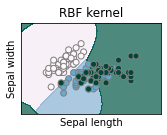

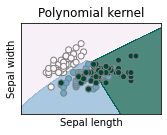

In [18]:
for i, clf in enumerate(( rbf, poly)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
 #ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it). A copy is made only if needed.                 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()